In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings("ignore")

# Loading dataset
diabetes_data = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
diabetes_data.head()

# The target variable is Diabetes_binary. This column indicates whether a person has diabetes or is prediabetic:
# 0 represents individuals with no diabetes.
# 1 represents individuals who have prediabetes or diabetes.


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


Correlations with Diabetes_binary:
Diabetes_binary         1.000000
GenHlth                 0.407612
HighBP                  0.381516
BMI                     0.293373
HighChol                0.289213
Age                     0.278738
DiffWalk                0.272646
PhysHlth                0.213081
HeartDiseaseorAttack    0.211523
Stroke                  0.125427
CholCheck               0.115382
MentHlth                0.087029
Smoker                  0.085999
Sex                     0.044413
NoDocbcCost             0.040977
AnyHealthcare           0.023191
Fruits                 -0.054077
Veggies                -0.079293
HvyAlcoholConsump      -0.094853
PhysActivity           -0.158666
Education              -0.170481
Income                 -0.224449
Name: Diabetes_binary, dtype: float64


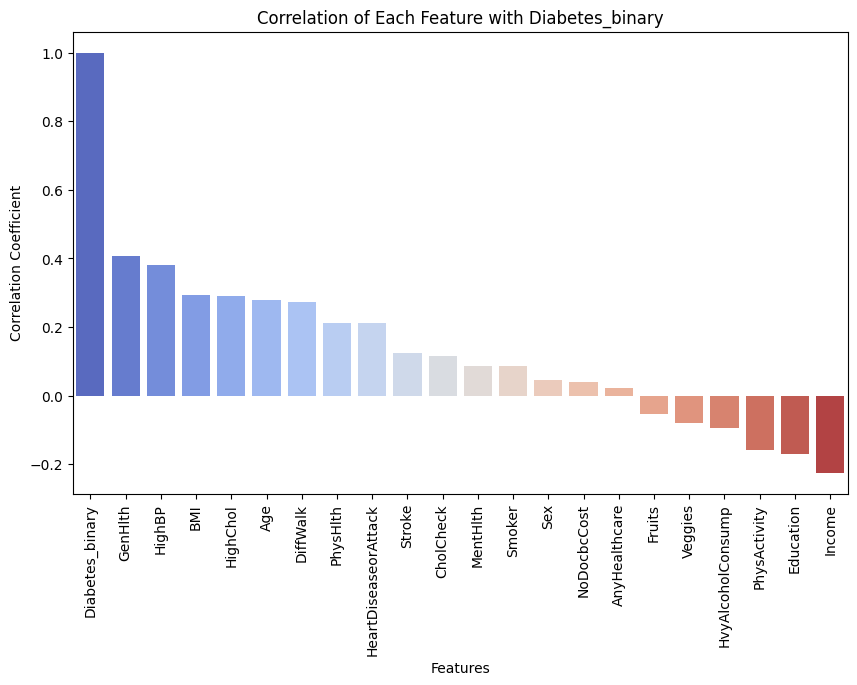

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add the target variable back to the dataset for correlation analysis
data_with_target = diabetes_data.copy()
data_with_target['Diabetes_binary'] = y

# Calculate the correlation matrix
correlation_matrix = data_with_target.corr()

# Extract correlations with the target variable
correlation_with_target = correlation_matrix['Diabetes_binary'].sort_values(ascending=False)

# Display correlations with the target variable
print("Correlations with Diabetes_binary:")
print(correlation_with_target)

# Plot the correlations with the target variable as a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Correlation of Each Feature with Diabetes_binary')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()


In [ ]:
#Droping the features
diabetes_data.drop(['CholCheck', 'Smoker', 'AnyHealthcare', 'Stroke'], axis=1, inplace=True)
diabetes_data.head()

,Diabetes_binary,HighBP,HighChol,BMI,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,26.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,26.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,26.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,28.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,29.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [ ]:
# Checking for missing values
missing_values = diabetes_data[pd.isnull(diabetes_data).any(axis=1)]

missing_values.head()


,Diabetes_binary,HighBP,HighChol,BMI,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income


In [ ]:
# Defining features and target variable
y = diabetes_data['Diabetes_binary'].copy()
X = diabetes_data.drop(columns=['Diabetes_binary'])

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)


Cross-Validation Scores: [0.74214904 0.74622305 0.75176823 0.75148532]
Accuracy: 0.7494483109828552
Precision: 0.7263614756639455
Recall: 0.7979339312067204
F1: 0.7494483109828552


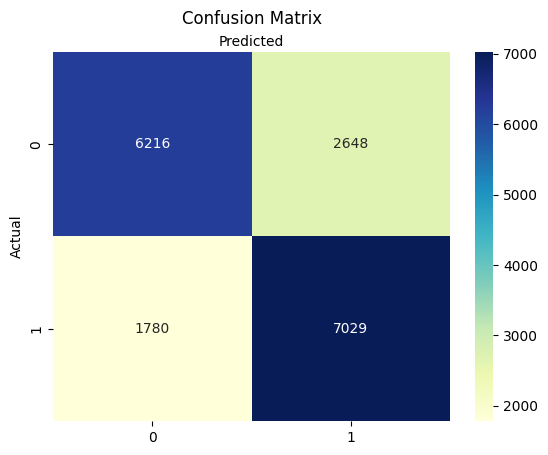

From the matrix:
The model correctly classified a total of 6216 (True Negatives) + 7029 (True Positives) = 13245 instances.
It misclassified a total of 2648 (False Positives) + 1780 (False Negatives) = 4428 instances.


In [ ]:
# Importing MLPClassifier and defining the model
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Define the MLP model
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(25, 15), random_state=1)

# Performing cross-validation with K=4
cv_scores_mlp = cross_val_score(mlp, X, y, cv=4)
print("Cross-Validation Scores:", cv_scores_mlp)

# Training the model and making predictions
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

# Calculating performance metrics
accuracy_mlp = metrics.accuracy_score(y_test, y_pred_mlp)
precision_mlp = metrics.precision_score(y_test, y_pred_mlp)
recall_mlp = metrics.recall_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp, average='micro')

# Displaying metrics
print("Accuracy:", accuracy_mlp)
print("Precision:", precision_mlp)
print("Recall:", recall_mlp)
print("F1:", f1_mlp)

# Generating and visualizing the confusion matrix
conf_matrix_mlp = metrics.confusion_matrix(y_test, y_pred_mlp)

# Defining labels and plot heatmap
labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# Plotting heatmap
sns.heatmap(pd.DataFrame(conf_matrix_mlp), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion Matrix', pad=20)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

tn, fp, fn, tp = conf_matrix_mlp.ravel()
total_correct = tn + tp
total_misclassified = fp + fn

print(f"From the matrix:")
print(f"The model correctly classified a total of {tn} (True Negatives) + {tp} (True Positives) = {total_correct} instances.")
print(f"It misclassified a total of {fp} (False Positives) + {fn} (False Negatives) = {total_misclassified} instances.")

Trial 10 Complete [00h 00m 26s]
val_accuracy: 0.7323843836784363

Best val_accuracy So Far: 0.7402528524398804
Total elapsed time: 00h 07m 59s
Best hyperparameters: {'units_layer1': 32, 'dropout_rate1': 0.1, 'units_layer2': 32, 'dropout_rate2': 0.4, 'learning_rate': 0.001083033272419774}
Epoch 1/50
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5885 - loss: 0.8459 - val_accuracy: 0.7150 - val_loss: 0.5620
Epoch 2/50
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7072 - loss: 0.5762 - val_accuracy: 0.7296 - val_loss: 0.5451
Epoch 3/50
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7196 - loss: 0.5596 - val_accuracy: 0.7320 - val_loss: 0.5391
Epoch 4/50
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7196 - loss: 0.5603 - val_accuracy: 0.7325 - val_loss: 0.5363
Epoch 5/50
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7263 - loss: 0.5502 - val_accuracy: 0.7354 - val_loss: 0.5359
Epoch 6/50
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accur

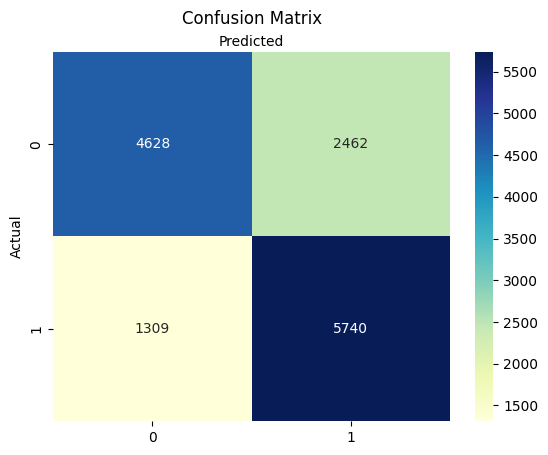

In [ ]:
!pip install keras-tuner

# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import keras_tuner as kt

# Define the tunable model architecture
def build_mlp(hp):
    model = Sequential()
    # Tunable number of neurons in the first hidden layer
    model.add(Dense(units=hp.Int('units_layer1', min_value=32, max_value=128, step=32),
                    input_dim=X_train.shape[1], activation='relu'))
    # Tunable dropout rate for the first hidden layer
    model.add(Dropout(rate=hp.Float('dropout_rate1', min_value=0.1, max_value=0.5, step=0.1)))

    # Second hidden layer
    model.add(Dense(units=hp.Int('units_layer2', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_rate2', min_value=0.1, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Tunable learning rate
    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Split the data (assuming X and y are already defined)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Keras Tuner RandomSearch
tuner = kt.RandomSearch(build_mlp,
                        objective='val_accuracy',
                        max_trials=10,  # Number of combinations to try
                        executions_per_trial=1,  # Number of model fits per trial
                        directory='keras_tuner_dir',
                        project_name='mlp_hyperparameter_tuning')

# Run the tuner to search for the best hyperparameters
tuner.search(X_train, y_train, epochs=5, validation_split=0.2, batch_size=32, verbose=1)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best hyperparameters: {best_hps.values}")

# Build the model with the best hyperparameters and train it
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions
y_pred_mlp = (best_model.predict(X_test) > 0.5).astype("int32")

# Calculate performance metrics
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)

print("Accuracy:", accuracy_mlp)
print("Precision:", precision_mlp)
print("Recall:", recall_mlp)
print("F1 Score:", f1_mlp)

# Generate and visualize confusion matrix
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)

# Define labels and plot confusion matrix
labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

sns.heatmap(pd.DataFrame(conf_matrix_mlp), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion Matrix', pad=20)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
